In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 範例

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)

In [8]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[reduce_lr]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0729 07:44:28.793949  6216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 07:44:28.856371  6216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 07:44:28.868090  6216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0729 07:44:28.973038  6216 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\envs\TensorFlow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.8291 - acc: 0.7301 - val_loss: 1.4720 - val_acc: 0.4973
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.8278 - acc: 0.7318 - val_loss: 1.4717 - val_acc: 0.4974
Epoch 49/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.8268 - acc: 0.7317 - val_loss: 1.4722 - val_acc: 0.4971
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.8267 - acc: 0.7316 - val_loss: 1.4723 - val_acc: 0.4968

Epoch 00050: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.


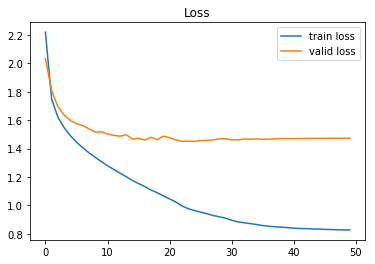

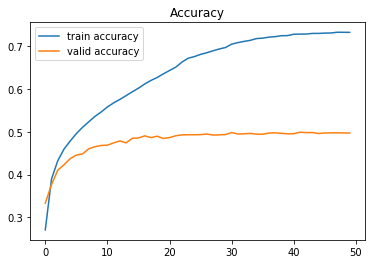

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# Homework
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

## patience and factor

In [16]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

params = {'PATIENCE': [3, 5, 10, 15], 
          'FACTOR': [0.2, 0.4, 0.6, 0.8]}

In [25]:
# 載入 Callbacks
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import ParameterGrid

In [26]:
results = {}
for i in ParameterGrid(params):
    keras.backend.clear_session()
    print(str(i))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    reduce_lr = ReduceLROnPlateau(factor=i['FACTOR'], 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=i['PATIENCE'], 
                                  verbose=1)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[reduce_lr])
    
    exp_name_tag = str(i)
    results[exp_name_tag] = {'train_loss': model.history.history['loss'],
                             'valid_loss': model.history.history['val_loss'],
                             'train_acc': model.history.history['acc'],
                             'valid_acc': model.history.history['val_acc']}

{'FACTOR': 0.2, 'PATIENCE': 3}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)     

50000/50000 [==============================] - 4s 72us/step - loss: 0.8942 - acc: 0.7066 - val_loss: 1.4536 - val_acc: 0.5041
Epoch 47/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8943 - acc: 0.7076 - val_loss: 1.4536 - val_acc: 0.5042
Epoch 48/50
50000/50000 [==============================] - 4s 73us/step - loss: 0.8953 - acc: 0.7073 - val_loss: 1.4536 - val_acc: 0.5043

Epoch 00048: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Epoch 49/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.8952 - acc: 0.7078 - val_loss: 1.4536 - val_acc: 0.5040
Epoch 50/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.8940 - acc: 0.7073 - val_loss: 1.4536 - val_acc: 0.5040
{'FACTOR': 0.2, 'PATIENCE': 5}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________

50000/50000 [==============================] - 4s 72us/step - loss: 0.8956 - acc: 0.7074 - val_loss: 1.4531 - val_acc: 0.4982
Epoch 43/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8958 - acc: 0.7069 - val_loss: 1.4531 - val_acc: 0.4981
Epoch 44/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.8951 - acc: 0.7078 - val_loss: 1.4531 - val_acc: 0.4977
Epoch 45/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8959 - acc: 0.7064 - val_loss: 1.4531 - val_acc: 0.4972
Epoch 46/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.8957 - acc: 0.7065 - val_loss: 1.4531 - val_acc: 0.4976

Epoch 00046: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
Epoch 47/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8957 - acc: 0.7066 - val_loss: 1.4531 - val_acc: 0.4972
Epoch 48/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.8962 - acc: 0.7066 - 

50000/50000 [==============================] - 3s 62us/step - loss: 0.8061 - acc: 0.7436 - val_loss: 1.4762 - val_acc: 0.5004
Epoch 40/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8020 - acc: 0.7444 - val_loss: 1.4765 - val_acc: 0.4977
Epoch 41/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8002 - acc: 0.7450 - val_loss: 1.4762 - val_acc: 0.4977
Epoch 42/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.7990 - acc: 0.7453 - val_loss: 1.4772 - val_acc: 0.4986
Epoch 43/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7981 - acc: 0.7465 - val_loss: 1.4779 - val_acc: 0.4997
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7972 - acc: 0.7464 - val_loss: 1.4773 - val_acc: 0.4989
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.7966 - acc: 0.7462 - val_loss: 1.4791 - val_acc: 0.4994
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 63us/step - loss: 0.7218 - acc: 0.7726 - val_loss: 1.5474 - val_acc: 0.4843
Epoch 38/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.7036 - acc: 0.7778 - val_loss: 1.5433 - val_acc: 0.4929
Epoch 39/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6853 - acc: 0.7873 - val_loss: 1.5500 - val_acc: 0.4908
Epoch 40/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.6657 - acc: 0.7936 - val_loss: 1.5523 - val_acc: 0.4894
Epoch 41/50
50000/50000 [==============================] - 4s 75us/step - loss: 0.6488 - acc: 0.8029 - val_loss: 1.5974 - val_acc: 0.4937

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 42/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.6268 - acc: 0.8118 - val_loss: 1.5499 - val_acc: 0.4965
Epoch 43/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.5953 - acc: 0.8272 -

50000/50000 [==============================] - 3s 65us/step - loss: 0.9031 - acc: 0.7060 - val_loss: 1.4498 - val_acc: 0.5036

Epoch 00033: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.
Epoch 34/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9015 - acc: 0.7074 - val_loss: 1.4496 - val_acc: 0.5036
Epoch 35/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8997 - acc: 0.7087 - val_loss: 1.4498 - val_acc: 0.5037
Epoch 36/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8987 - acc: 0.7083 - val_loss: 1.4499 - val_acc: 0.5028

Epoch 00036: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.
Epoch 37/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.8978 - acc: 0.7089 - val_loss: 1.4499 - val_acc: 0.5032
Epoch 38/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8983 - acc: 0.7090 - val_loss: 1.4507 - val_acc: 0.5034
Epoch 39/50
50000/500

50000/50000 [==============================] - 3s 65us/step - loss: 0.9206 - acc: 0.6962 - val_loss: 1.4464 - val_acc: 0.4978
Epoch 28/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.9116 - acc: 0.7018 - val_loss: 1.4436 - val_acc: 0.5012
Epoch 29/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.9031 - acc: 0.7043 - val_loss: 1.4521 - val_acc: 0.4993
Epoch 30/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.8947 - acc: 0.7066 - val_loss: 1.4503 - val_acc: 0.4994
Epoch 31/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.8852 - acc: 0.7114 - val_loss: 1.4543 - val_acc: 0.4989

Epoch 00031: ReduceLROnPlateau reducing learning rate to 0.00016000000759959222.
Epoch 32/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.8714 - acc: 0.7186 - val_loss: 1.4478 - val_acc: 0.5061
Epoch 33/50
50000/50000 [==============================] - 3s 63us/step - loss: 0.8636 - acc: 0.7201 -

50000/50000 [==============================] - 3s 68us/step - loss: 0.9933 - acc: 0.6668 - val_loss: 1.4621 - val_acc: 0.4890
Epoch 24/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.9719 - acc: 0.6736 - val_loss: 1.4607 - val_acc: 0.4918
Epoch 25/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.9510 - acc: 0.6834 - val_loss: 1.4772 - val_acc: 0.4953
Epoch 26/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.9311 - acc: 0.6903 - val_loss: 1.4740 - val_acc: 0.4895
Epoch 27/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.9102 - acc: 0.6992 - val_loss: 1.4820 - val_acc: 0.4890
Epoch 28/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.8902 - acc: 0.7049 - val_loss: 1.4925 - val_acc: 0.4873

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
Epoch 29/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.8613 - acc: 0.7187 - 

50000/50000 [==============================] - 4s 72us/step - loss: 1.0790 - acc: 0.6303 - val_loss: 1.4882 - val_acc: 0.4824
Epoch 21/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.0582 - acc: 0.6385 - val_loss: 1.4666 - val_acc: 0.4904
Epoch 22/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.0361 - acc: 0.6481 - val_loss: 1.4725 - val_acc: 0.4897
Epoch 23/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.0150 - acc: 0.6562 - val_loss: 1.4763 - val_acc: 0.4908
Epoch 24/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.9956 - acc: 0.6640 - val_loss: 1.4841 - val_acc: 0.4856
Epoch 25/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9742 - acc: 0.6717 - val_loss: 1.4782 - val_acc: 0.4854
Epoch 26/50
50000/50000 [==============================] - 4s 72us/step - loss: 0.9534 - acc: 0.6791 - val_loss: 1.4911 - val_acc: 0.4870
Epoch 27/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 66us/step - loss: 1.1056 - acc: 0.6229 - val_loss: 1.4511 - val_acc: 0.4986
Epoch 19/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.0842 - acc: 0.6288 - val_loss: 1.4513 - val_acc: 0.4940
Epoch 20/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.0632 - acc: 0.6400 - val_loss: 1.4456 - val_acc: 0.4950

Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.0006000000284984708.
Epoch 21/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.0356 - acc: 0.6500 - val_loss: 1.4471 - val_acc: 0.4963
Epoch 22/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.0164 - acc: 0.6587 - val_loss: 1.4355 - val_acc: 0.4958
Epoch 23/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.0012 - acc: 0.6635 - val_loss: 1.4372 - val_acc: 0.4965
Epoch 24/50
50000/50000 [==============================] - 3s 64us/step - loss: 0.9888 - acc: 0.6677 - 

Epoch 11/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.2712 - acc: 0.5594 - val_loss: 1.5109 - val_acc: 0.4656
Epoch 12/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.2444 - acc: 0.5688 - val_loss: 1.4905 - val_acc: 0.4709
Epoch 13/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.2183 - acc: 0.5786 - val_loss: 1.4941 - val_acc: 0.4780
Epoch 14/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.1944 - acc: 0.5904 - val_loss: 1.4735 - val_acc: 0.4806
Epoch 15/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.1683 - acc: 0.5979 - val_loss: 1.4762 - val_acc: 0.4793
Epoch 16/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.1445 - acc: 0.6058 - val_loss: 1.4727 - val_acc: 0.4806
Epoch 17/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1217 - acc: 0.6147 - val_loss: 1.4775 - val_acc: 0.4825
Epoch 18/50
50000/50000 [=========

50000/50000 [==============================] - 4s 77us/step - loss: 1.4429 - acc: 0.4943 - val_loss: 1.5686 - val_acc: 0.4466
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4050 - acc: 0.5080 - val_loss: 1.5765 - val_acc: 0.4515
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.3701 - acc: 0.5216 - val_loss: 1.5423 - val_acc: 0.4578
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3364 - acc: 0.5352 - val_loss: 1.5250 - val_acc: 0.4663
Epoch 10/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.3054 - acc: 0.5466 - val_loss: 1.5210 - val_acc: 0.4675
Epoch 11/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.2781 - acc: 0.5553 - val_loss: 1.5072 - val_acc: 0.4679
Epoch 12/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.2512 - acc: 0.5665 - val_loss: 1.4943 - val_acc: 0.4760
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 4s 72us/step - loss: 1.6255 - acc: 0.4338 - val_loss: 1.6826 - val_acc: 0.4142
Epoch 4/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5484 - acc: 0.4594 - val_loss: 1.6311 - val_acc: 0.4274
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4916 - acc: 0.4796 - val_loss: 1.5983 - val_acc: 0.4388
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4463 - acc: 0.4965 - val_loss: 1.5639 - val_acc: 0.4471
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.4041 - acc: 0.5115 - val_loss: 1.5450 - val_acc: 0.4566
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.3684 - acc: 0.5252 - val_loss: 1.5253 - val_acc: 0.4576
Epoch 9/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.3339 - acc: 0.5378 - val_loss: 1.5262 - val_acc: 0.4630
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 4s 80us/step - loss: 2.2045 - acc: 0.2732 - val_loss: 2.0672 - val_acc: 0.3225
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7459 - acc: 0.3911 - val_loss: 1.8000 - val_acc: 0.3800
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.6173 - acc: 0.4348 - val_loss: 1.6774 - val_acc: 0.4186
Epoch 4/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5402 - acc: 0.4604 - val_loss: 1.6404 - val_acc: 0.4296
Epoch 5/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.4877 - acc: 0.4783 - val_loss: 1.5907 - val_acc: 0.4453
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4407 - acc: 0.4954 - val_loss: 1.5620 - val_acc: 0.4516
Epoch 7/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4019 - acc: 0.5117 - val_loss: 1.5407 - val_acc: 0.4606
Epoch 8/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2234 - acc: 0.2663 - val_loss: 2.0633 - val_acc: 0.3209
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7533 - acc: 0.3934 - val_loss: 1.7865 - val_acc: 0.3821
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.6237 - acc: 0.4352 - val_loss: 1.6748 - val_acc: 0.4151
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.5472 - acc: 0.4605 - val_loss: 1.6237 - val_acc: 0.4333
Epoch 5/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.4909 - acc: 0.4802 - val_loss: 1.5950 - val_acc: 0.4434
Epoch 6/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.4449 - acc: 0.4956 - val_loss: 1.5720 - val_acc: 0.4542
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4053 - acc: 0.5098 - val_loss: 1.5436 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.1959 - acc: 0.2701 - val_loss: 2.0291 - val_acc: 0.3241
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7233 - acc: 0.3963 - val_loss: 1.7813 - val_acc: 0.3834
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.6089 - acc: 0.4362 - val_loss: 1.6683 - val_acc: 0.4219
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5402 - acc: 0.4609 - val_loss: 1.6517 - val_acc: 0.4234
Epoch 5/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.4889 - acc: 0.4787 - val_loss: 1.5911 - val_acc: 0.4439
Epoch 6/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4432 - acc: 0.4953 - val_loss: 1.5669 - val_acc: 0.4523
Epoch 7/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4057 - acc: 0.5096 - val_loss: 1.5478 - val_ac

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.1876 - acc: 0.2747 - val_loss: 2.0057 - val_acc: 0.3340
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7389 - acc: 0.3957 - val_loss: 1.8323 - val_acc: 0.3734
Epoch 3/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.6208 - acc: 0.4341 - val_loss: 1.7058 - val_acc: 0.4030
Epoch 4/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5490 - acc: 0.4608 - val_loss: 1.6363 - val_acc: 0.4283
Epoch 5/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4949 - acc: 0.4797 - val_loss: 1.5905 - val_acc: 0.4429
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4495 - acc: 0.4949 - val_loss: 1.5548 - val_acc: 0.4581
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4092 - acc: 0.5095 - val_loss: 1.5389 - val_ac

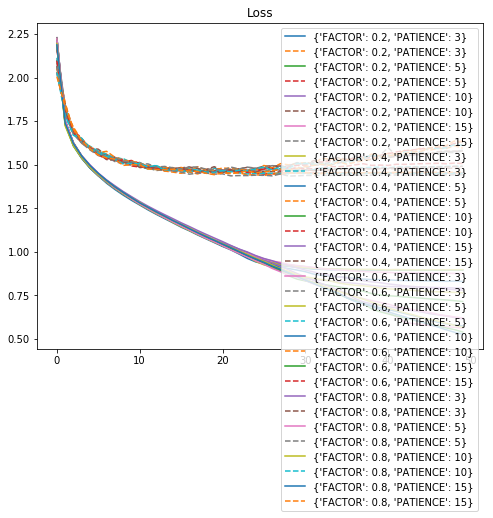

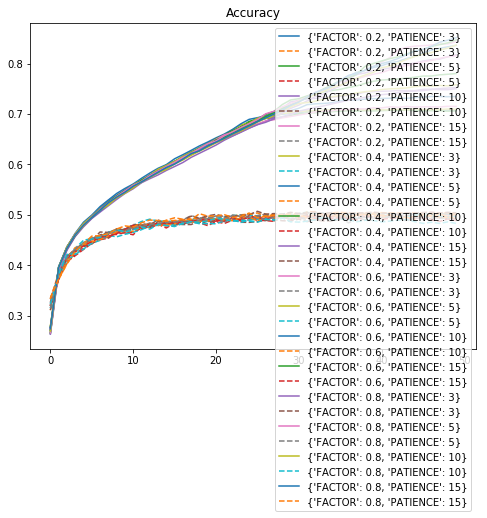

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()

## optimizer

In [36]:
# 載入 optimizers
sgd = keras.optimizers.Adam(lr=LEARNING_RATE)
adam = keras.optimizers.Adam(lr=LEARNING_RATE)
rms = keras.optimizers.RMSprop(lr=LEARNING_RATE)

## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

optimizers = ['sgd', 'adam', 'rmsprop']

In [37]:
results = {}
for i in optimizers:
    keras.backend.clear_session()
    print(str(i))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=i)
    
    reduce_lr = ReduceLROnPlateau(factor=0.5, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=5, 
                                  verbose=1)
    
    model.fit(x_train, y_train,
              epochs = EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[reduce_lr])
    
    exp_name_tag = str(i)
    results[exp_name_tag] = {'train_loss': model.history.history['loss'],
                             'valid_loss': model.history.history['val_loss'],
                             'train_acc': model.history.history['acc'],
                             'valid_acc': model.history.history['val_acc']}

sgd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
______


Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.0012499999720603228.
Epoch 49/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.9107 - acc: 0.6995 - val_loss: 1.4742 - val_acc: 0.4968
Epoch 50/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.9107 - acc: 0.7005 - val_loss: 1.4733 - val_acc: 0.4969
adam
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________

50000/50000 [==============================] - 5s 96us/step - loss: 0.2847 - acc: 0.9390 - val_loss: 1.6706 - val_acc: 0.5229
Epoch 44/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2850 - acc: 0.9390 - val_loss: 1.6724 - val_acc: 0.5242
Epoch 45/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.2832 - acc: 0.9396 - val_loss: 1.6762 - val_acc: 0.5243
Epoch 46/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2818 - acc: 0.9393 - val_loss: 1.6745 - val_acc: 0.5226
Epoch 47/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.2817 - acc: 0.9399 - val_loss: 1.6777 - val_acc: 0.5243

Epoch 00047: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 48/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.2799 - acc: 0.9418 - val_loss: 1.6774 - val_acc: 0.5238
Epoch 49/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.2794 - acc: 0.9410 - 

50000/50000 [==============================] - 4s 82us/step - loss: 0.3288 - acc: 0.9145 - val_loss: 1.6899 - val_acc: 0.5268
Epoch 40/50
50000/50000 [==============================] - 4s 76us/step - loss: 0.3241 - acc: 0.9164 - val_loss: 1.7002 - val_acc: 0.5253
Epoch 41/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.3204 - acc: 0.9184 - val_loss: 1.7109 - val_acc: 0.5263

Epoch 00041: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 42/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.3096 - acc: 0.9227 - val_loss: 1.7022 - val_acc: 0.5252
Epoch 43/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.3077 - acc: 0.9223 - val_loss: 1.7022 - val_acc: 0.5288
Epoch 44/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.3052 - acc: 0.9245 - val_loss: 1.7081 - val_acc: 0.5288
Epoch 45/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.3035 - acc: 0.9261 - 

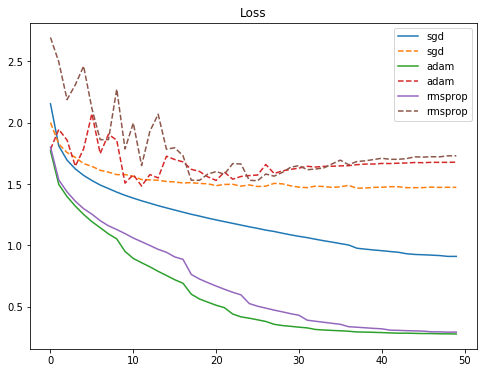

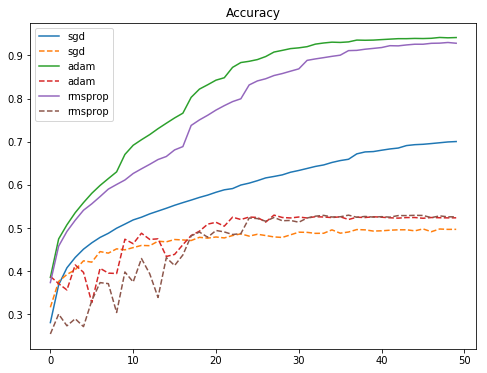

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
# color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()